In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\Arya\Desktop\data_science\ICT\CaseStudy2\Wholesale customers data.csv")   # load the dataset and save it into a variable "data"

In [3]:
data.head()   # print the head of data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


data.info()     #NO null value present in the data

# PCA

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# import Standard scaler for scaling the data.
# All the columns are number.
# Save it into a new variable 'scaled_data'.

In [5]:
import pandas as pd

scaled_data = pd.DataFrame(
    scaled_data,
    columns=data.columns,
    index=data.index)
    
# 'scaled_data' is now in the form of arry.
# convert it into a datadrame by using panda's DataFrame function.

In [6]:
scaled_data.head()
# printing the head of scaled_data.

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [7]:
import numpy as np
from sklearn.decomposition import PCA

# importing numpy and PCA

In [8]:
pca=PCA( )
pca.fit(scaled_data)
y=np.cumsum(pca.explained_variance_ratio_)

# fitting PCA.
# Finding the cumulative sum of explained varience ratio.

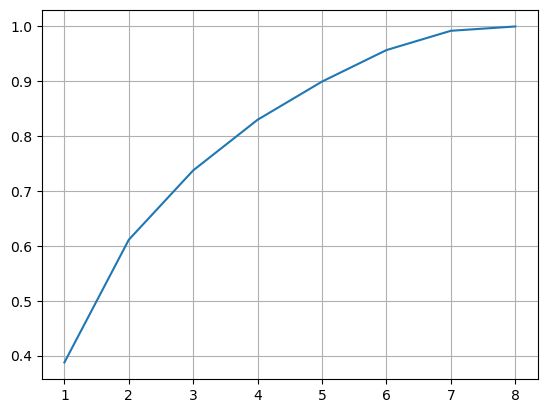

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(1,len(y)+1),y)
plt.grid()

# Drawing a graph to find out optimum number of PCA features.

In [10]:
pca = PCA(n_components=.95)  
X_pca = pca.fit_transform(scaled_data)

print("Final dimension after PCA:", X_pca.shape[1])

# This code explained that, if I need only 95% of data, then the dimension is 6.

Final dimension after PCA: 6


In [11]:
X_pca=pd.DataFrame(X_pca,columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])

# Reduced the dimensionality of data from 8 to 6.

In [12]:
X_pca.head()

# print the head of data after applying PCA.

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.843939,-0.515351,0.767632,0.044215,-0.446234,0.939441
1,1.062676,-0.484601,0.672975,-0.401372,-0.130458,0.867227
2,1.269141,0.682055,0.664095,-1.634953,-1.193813,1.078442
3,-1.056782,0.610821,0.505654,-0.196005,0.457855,-0.116959
4,0.634030,0.974199,0.771209,-0.186374,-0.813877,1.505372


<Axes: xlabel='PC1', ylabel='PC2'>

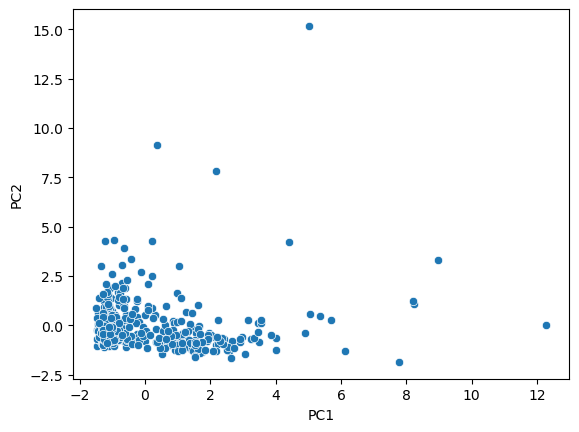

In [13]:
import seaborn as sns
sns.scatterplot(x="PC1",y="PC2",data=X_pca)

# scatter plot of first two features.

# KMEANS

In [14]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score, make_scorer
import numpy as np

# import KMeans, for applying the algorithm.
# Grisearchcv for hyperparameter tuning.
# Silhouette score is an evaluation metrics for unsupervised ML models.

In [15]:
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6, 7, 8],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30]
}

# These are the parameters check in hyperparameter tuning.

In [16]:
kmeans = KMeans(random_state=42)
silhouette_scorer = make_scorer(silhouette_score)

grid_search = GridSearchCV(
    estimator=kmeans,
    param_grid=param_grid,
    cv=5
)

grid_search.fit(X_pca)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'init': 'random', 'n_clusters': 8, 'n_init': 20}


In [17]:
kmeans = KMeans(n_clusters=8,init='random',n_init=20,max_iter=300)  # Example with 3 clusters
data['Cluster'] = kmeans.fit_predict(X_pca)
data.head()

# applying KMeans algorithm based on parameters get from hyperparameter tuning.

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,4
1,2,3,7057,9810,9568,1762,3293,1776,4
2,2,3,6353,8808,7684,2405,3516,7844,4
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,4


In [18]:
data['Cluster'].value_counts()

Cluster
0    154
4     81
6     79
2     43
1     35
7     34
3     10
5      4
Name: count, dtype: int64

In [19]:
from sklearn.metrics import silhouette_score
labels = kmeans.labels_
silhouette_avg = silhouette_score(X_pca, labels)

print(silhouette_avg)

0.37517960353833746


In [20]:
cluster_summary = data.groupby("Cluster").agg({
    "Channel": "count",
    "Region": "count",
    "Fresh": ["mean"],
    "Milk": ["mean"],
    "Grocery": ["mean"],
    "Frozen": ["mean"],
    "Detergents_Paper": ["mean"],
    "Delicassen": ["mean"]
})

cluster_summary

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
,count,count,mean,mean,mean,mean,mean,mean
Cluster,,,,,,,,
0,154,154,7867.090909,2859.610390,3474.467532,1885.961039,805.818182,1002.058442
1,35,35,39651.971429,3786.285714,4738.971429,4151.714286,656.342857,1890.771429
2,43,43,4678.255814,12647.162791,21175.813953,1280.883721,9368.906977,1688.069767
3,10,10,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000
4,81,81,9170.604938,6993.148148,10619.037037,1380.246914,4484.555556,1460.259259
5,4,4,52022.000000,31696.000000,18490.750000,29825.500000,2699.000000,19656.250000
6,79,79,10290.645570,3334.962025,4095.354430,2665.392405,919.164557,1071.772152
7,34,34,16355.823529,3819.205882,4237.147059,11429.705882,662.205882,1966.411765


# DBSCAN

In [21]:
from sklearn.cluster import DBSCAN

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
import numpy as np


def dbscan_silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    

    mask = labels != -1
    

    if len(set(labels[mask])) > 1:
        return silhouette_score(X[mask], labels[mask])
    else:
        return -1 


param_grid = {
    'eps': np.arange(0.1, 2.0, 0.1),
    'min_samples': [3, 5, 7, 10]
}


dbscan = DBSCAN()


grid_search = GridSearchCV(
    estimator=dbscan,
    param_grid=param_grid,
    scoring=dbscan_silhouette_scorer,
    cv=5
)


grid_search.fit(X_pca)

print("Best Parameters:", grid_search.best_params_)
print("Best Silhouette Score:", grid_search.best_score_)

Best Parameters: {'eps': np.float64(0.8), 'min_samples': 5}
Best Silhouette Score: 0.5771460985321023


In [23]:

dbscan_final = DBSCAN(eps=0.8, min_samples=5)

clusters = dbscan_final.fit_predict(X_pca)

if isinstance(X_pca, pd.DataFrame):
    X_pca['Cluster'] = clusters
else:
    X_pca = pd.DataFrame(X_pca)
    X_pca['Cluster'] = clusters

print("Cluster counts:\n")
print(X_pca['Cluster'].value_counts())

Cluster counts:

Cluster
 1    184
-1     86
 0     85
 3     49
 4     25
 2      6
 5      5
Name: count, dtype: int64


In [24]:
from sklearn.metrics import silhouette_score

mask = clusters != -1

if len(set(clusters[mask])) > 1:
    score = silhouette_score(X_pca.iloc[:, :-1][mask], clusters[mask])
    print("Silhouette Score:", score)
else:
    print("Silhouette score cannot be calculated.")

Silhouette Score: 0.28733532678957496
